In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Maximo 4 decimales para los numeros por una cuestion de accesibilidad
pd.options.display.float_format = '{:,.4f}'.format

df = pd.read_csv('data/flights_preprocessed.csv')

In [2]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,0,2023,1,1,7,2023-01-01,DL,N3758Y,2835,DEN,...,108.0000,78.0000,391.0000,2,0.0000,0.0000,21.0000,0.0000,72.0000,0
1,1,2023,1,1,7,2023-01-01,B6,N590JB,1370,MCO,...,123.0000,90.0000,667.0000,3,100.0000,0.0000,9.0000,0.0000,0.0000,0
2,2,2023,1,1,7,2023-01-01,B6,N323JB,1371,LGA,...,171.0000,152.0000,"1,076.0000",5,0.0000,0.0000,0.0000,0.0000,NaN,0
3,3,2023,1,1,7,2023-01-01,B6,N323JB,1372,FLL,...,169.0000,133.0000,"1,076.0000",5,0.0000,0.0000,0.0000,0.0000,NaN,0
4,4,2023,1,1,7,2023-01-01,B6,N962JT,1387,BOS,...,414.0000,372.0000,"2,611.0000",11,28.0000,0.0000,11.0000,0.0000,0.0000,0


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 47 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   FlightDate                       object 
 5   Reporting_Airline                object 
 6   Tail_Number                      object 
 7   Flight_Number_Reporting_Airline  int64  
 8   Origin                           object 
 9   OriginCityName                   object 
 10  OriginState                      object 
 11  OriginStateName                  object 
 12  Dest                             object 
 13  DestCityName                     object 
 14  DestState                        object 
 15  DestStateName                    object 
 16  CRSDepTime                       int64  
 17  DepTime 

In [5]:
df[df.duplicated() == True] #No hay filas duplicadas

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings


In [6]:
# Separamos en 2 dataframes con datos numericos y categoricos
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [7]:
df_num.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'Flight_Number_Reporting_Airline', 'CRSDepTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'Cancelled',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DivAirportLandings'],
      dtype='object')

In [8]:
df_cat.columns

Index(['FlightDate', 'Reporting_Airline', 'Tail_Number', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DepTimeBlk',
       'ArrTimeBlk'],
      dtype='object')

In [9]:
# Pasamos unas columnas que son numeros pero tipo categoricas al dataframe de categoricas
df_cat['Flight_Number_Reporting_Airline'] = df['Flight_Number_Reporting_Airline']
df_cat['DepartureDelayGroups'] = df['DepartureDelayGroups']
df_cat['ArrivalDelayGroups'] = df['ArrivalDelayGroups']
df_cat['Cancelled'] = df['Cancelled']
df_cat['Diverted'] = df['Diverted']
df_cat['DistanceGroup'] = df['DistanceGroup']
df_cat['DepDel15'] = df['DepDel15']

In [10]:
df_num.drop(columns = ['Flight_Number_Reporting_Airline', 'DepartureDelayGroups','ArrivalDelayGroups','Cancelled','Diverted','DistanceGroup', 'DepDel15'], inplace=True)

In [11]:
df_num.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
count,"2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,148,096.0000","2,148,089.0000","2,148,089.0000","2,147,367.0000","2,147,367.0000",...,"2,183,344.0000","2,141,726.0000","2,141,726.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","2,183,349.0000","471,608.0000","2,183,349.0000"
mean,"2,023.0000",2.5333,15.6037,3.9938,"1,332.3588","1,336.6396",12.5658,15.6615,17.7545,"1,359.6292",...,146.1072,141.2946,115.5790,828.8713,5.1861,0.7970,2.9067,0.0310,25.9502,0.0038
std,0.0000,1.1211,8.6860,2.0081,495.2248,509.7054,54.8811,53.8647,9.7570,511.4316,...,73.3036,73.6278,71.5118,596.2451,35.8162,15.9112,15.6214,1.8598,58.5872,0.1209
min,"2,023.0000",1.0000,1.0000,1.0000,1.0000,1.0000,-68.0000,0.0000,1.0000,1.0000,...,-5.0000,16.0000,8.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"2,023.0000",2.0000,8.0000,2.0000,910.0000,912.0000,-5.0000,0.0000,12.0000,929.0000,...,92.0000,88.0000,63.0000,398.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"2,023.0000",3.0000,16.0000,4.0000,"1,324.0000","1,328.0000",-2.0000,0.0000,15.0000,"1,342.0000",...,130.0000,125.0000,99.0000,679.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"2,023.0000",4.0000,23.0000,6.0000,"1,740.0000","1,749.0000",10.0000,10.0000,20.0000,"1,803.0000",...,177.0000,173.0000,145.0000,"1,067.0000",0.0000,0.0000,0.0000,0.0000,30.0000,0.0000
max,"2,023.0000",4.0000,31.0000,7.0000,"2,359.0000","2,400.0000","4,413.0000","4,413.0000",222.0000,"2,400.0000",...,"1,425.0000",759.0000,724.0000,"5,095.0000","3,957.0000","1,747.0000","1,660.0000","1,460.0000","2,530.0000",9.0000


In [12]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'CRSDepTime', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DivAirportLandings'],
      dtype='object')

In [13]:
df['DepDel15'].value_counts()

DepDel15
0.0000    1691960
1.0000     456129
Name: count, dtype: int64

[Text(0, 0.5, 'Minutos de atraso')]

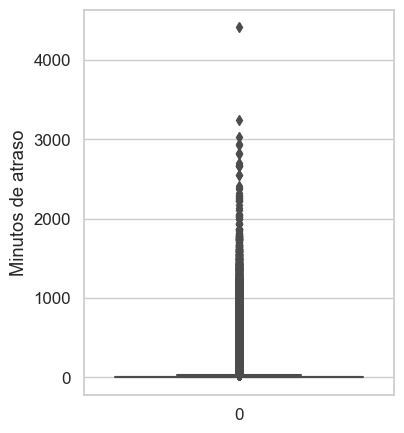

In [14]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [4, 5]})
sns.boxplot(
    df_num['DepDelayMinutes'], 
).set(ylabel='Minutos de atraso')

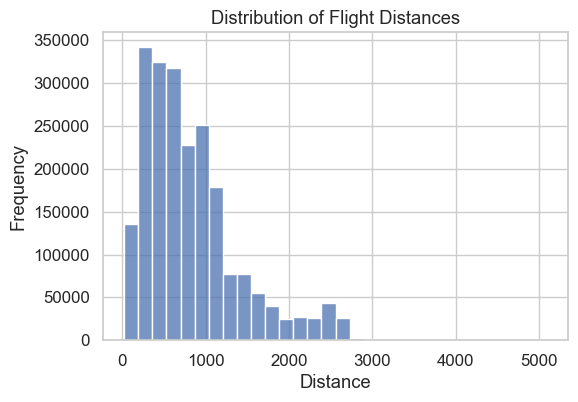

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Distance', bins=30)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

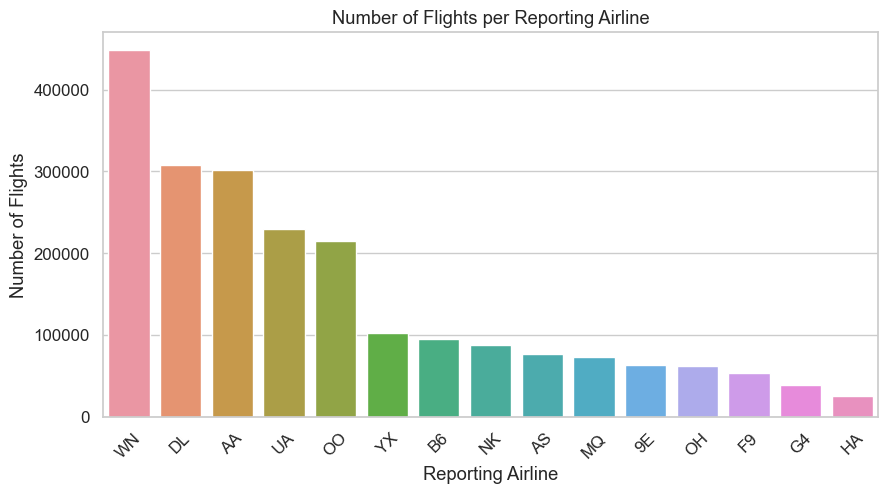

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Reporting_Airline', order=df['Reporting_Airline'].value_counts().index)
plt.title('Number of Flights per Reporting Airline')
plt.xlabel('Reporting Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

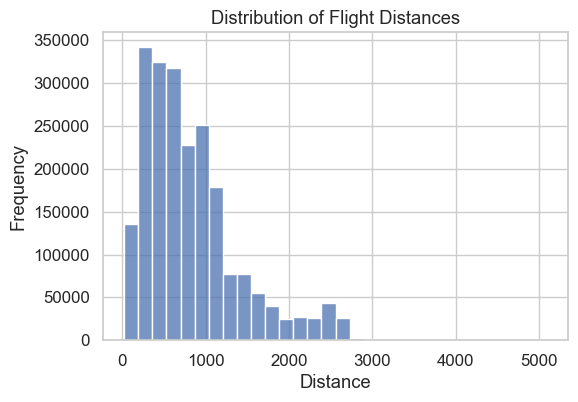

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Distance', bins=30)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

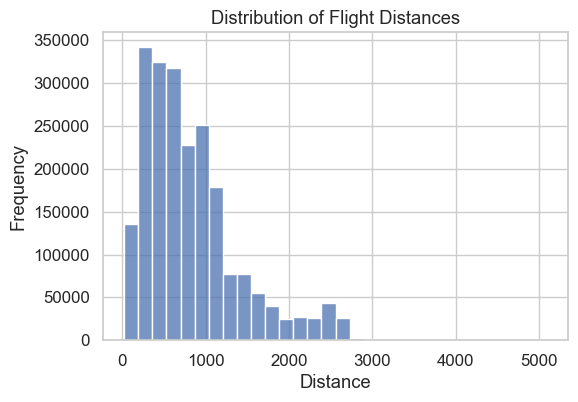

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Distance', bins=30)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

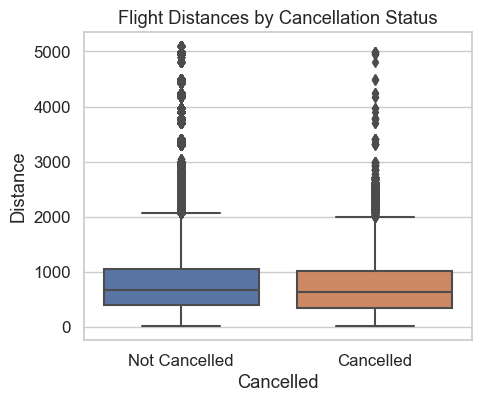

In [19]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Cancelled', y='Distance')
plt.title('Flight Distances by Cancellation Status')
plt.xlabel('Cancelled')
plt.ylabel('Distance')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

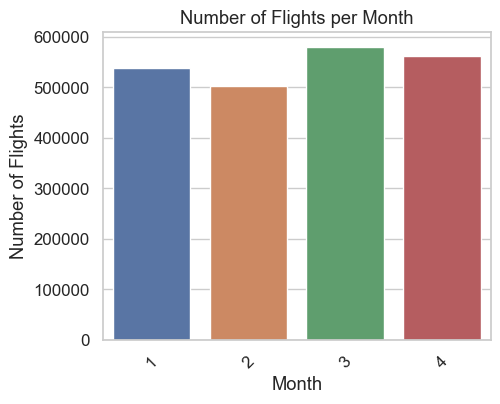

In [20]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Month')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [21]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 20 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Reporting_Airline                object 
 2   Tail_Number                      object 
 3   Origin                           object 
 4   OriginCityName                   object 
 5   OriginState                      object 
 6   OriginStateName                  object 
 7   Dest                             object 
 8   DestCityName                     object 
 9   DestState                        object 
 10  DestStateName                    object 
 11  DepTimeBlk                       object 
 12  ArrTimeBlk                       object 
 13  Flight_Number_Reporting_Airline  int64  
 14  DepartureDelayGroups             float64
 15  ArrivalDelayGroups               float64
 16  Cancelled                        float64
 17  Diverted

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 47 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   FlightDate                       object 
 5   Reporting_Airline                object 
 6   Tail_Number                      object 
 7   Flight_Number_Reporting_Airline  int64  
 8   Origin                           object 
 9   OriginCityName                   object 
 10  OriginState                      object 
 11  OriginStateName                  object 
 12  Dest                             object 
 13  DestCityName                     object 
 14  DestState                        object 
 15  DestStateName                    object 
 16  CRSDepTime                       int64  
 17  DepTime 

In [23]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

summary_df = df.groupby(['DayOfWeek', 'DepDel15']).size().unstack(fill_value=0)
summary_df['TotalFlights'] = summary_df.sum(axis=1)
summary_df['Prop_DepDel15'] = summary_df[1] / summary_df['TotalFlights']


In [24]:
summary_df

DepDel15,0.0,1.0,TotalFlights,Prop_DepDel15
DayOfWeek,,,,
1,252936,64805,317741,0.2040
2,244163,53112,297275,0.1787
3,231576,66085,297661,0.2220
4,249350,67649,316999,0.2134
5,248912,70769,319681,0.2214
6,214092,59160,273252,0.2165
7,250931,74549,325480,0.2290


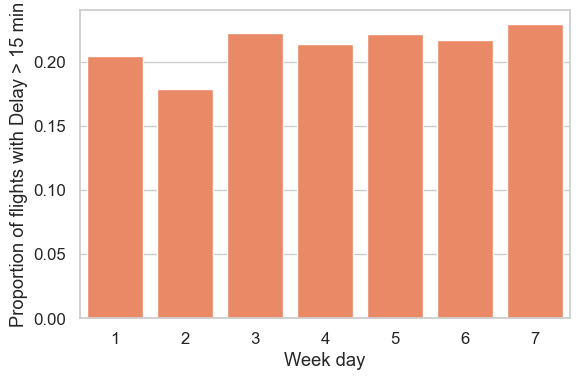

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(x=summary_df.index, y=summary_df['Prop_DepDel15'], color='coral')
plt.xlabel("Week day")
plt.ylabel("Proportion of flights with Delay > 15 min")
plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import chi2_contingency

# Suppose you already have the 'summary_df' DataFrame containing the proportion of flights with DepDel15 by day of the week.
# Make sure you have the 'DayOfWeek' and 'Prop_DepDel15' columns in 'summary_df'.

contingency_table = pd.pivot_table(summary_df, values='Prop_DepDel15', index='DayOfWeek', columns=None)

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p < alpha:
    print("There is a significant relationship between the day of the week and the proportion of flights with DepDel15.")
else:
    print("There is no significant relationship between the day of the week and the proportion of flights with DepDel15.")

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

There is no significant relationship between the day of the week and the proportion of flights with DepDel15.
Chi-squared Statistic: 0.0
P-value: 1.0


In [27]:
df['DepDel15'].value_counts()

DepDel15
0.0000    1691960
1.0000     456129
Name: count, dtype: int64

In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Year                int64  
 1   Month               int64  
 2   DayofMonth          int64  
 3   DayOfWeek           int64  
 4   CRSDepTime          int64  
 5   DepTime             float64
 6   DepDelay            float64
 7   DepDelayMinutes     float64
 8   TaxiOut             float64
 9   WheelsOff           float64
 10  WheelsOn            float64
 11  TaxiIn              float64
 12  CRSArrTime          int64  
 13  ArrTime             float64
 14  ArrDelay            float64
 15  ArrDelayMinutes     float64
 16  ArrDel15            float64
 17  CRSElapsedTime      float64
 18  ActualElapsedTime   float64
 19  AirTime             float64
 20  Distance            float64
 21  CarrierDelay        float64
 22  WeatherDelay        float64
 23  NASDelay            float64
 24  SecurityDelay       floa

In [29]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 20 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Reporting_Airline                object 
 2   Tail_Number                      object 
 3   Origin                           object 
 4   OriginCityName                   object 
 5   OriginState                      object 
 6   OriginStateName                  object 
 7   Dest                             object 
 8   DestCityName                     object 
 9   DestState                        object 
 10  DestStateName                    object 
 11  DepTimeBlk                       object 
 12  ArrTimeBlk                       object 
 13  Flight_Number_Reporting_Airline  int64  
 14  DepartureDelayGroups             float64
 15  ArrivalDelayGroups               float64
 16  Cancelled                        float64
 17  Diverted

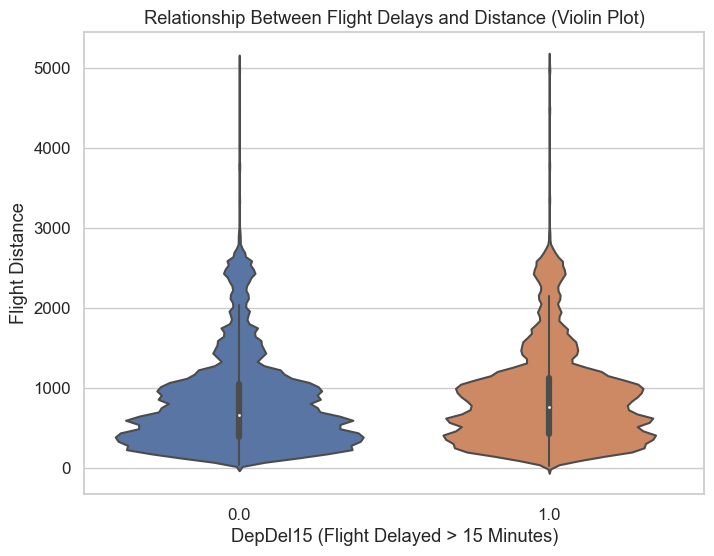

In [30]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='DepDel15', y='Distance')
plt.xlabel("DepDel15 (Flight Delayed > 15 Minutes)")
plt.ylabel("Flight Distance")
plt.title("Relationship Between Flight Delays and Distance (Violin Plot)")
plt.show()

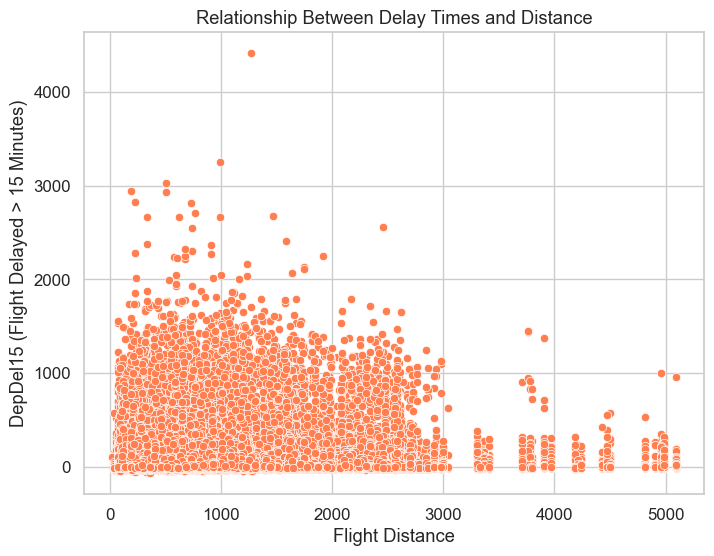

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_num, x='Distance', y='DepDelay', color='coral')
plt.ylabel("DepDel15 (Flight Delayed > 15 Minutes)")
plt.xlabel("Flight Distance")
plt.title("Relationship Between Delay Times and Distance")
plt.show()

In [32]:
bin_width = 250

max_distance = df['Distance'].max()
num_bins = int(np.ceil(max_distance / bin_width))

bins = np.arange(0, (num_bins + 1) * bin_width, bin_width)

df['DistanceBin'] = pd.cut(df['Distance'], bins=bins, labels=bins[:-1])

bin_proportions = df.groupby('DistanceBin')['DepDel15'].mean().reset_index()

bin_proportions.columns = ['DistanceBin', 'ProportionDelayed']

print(bin_proportions)

   DistanceBin  ProportionDelayed
0            0             0.1798
1          250             0.1859
2          500             0.2047
3          750             0.2303
4         1000             0.2489
5         1250             0.2266
6         1500             0.2419
7         1750             0.2438
8         2000             0.2502
9         2250             0.2254
10        2500             0.2401
11        2750             0.1895
12        3000             0.5000
13        3250             0.2576
14        3500             0.1321
15        3750             0.2214
16        4000             0.1837
17        4250             0.3664
18        4500             0.3849
19        4750             0.3109
20        5000             0.4336


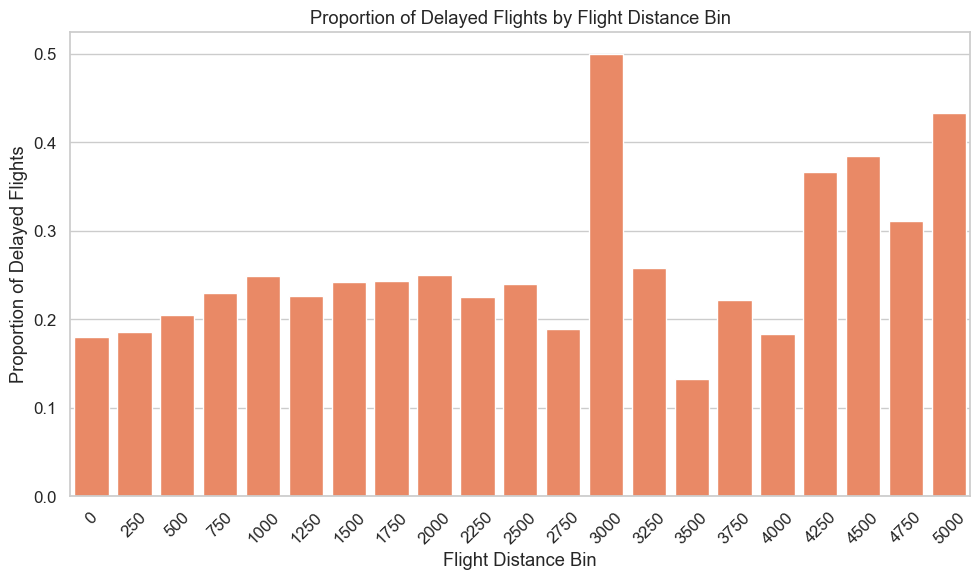

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_proportions, x='DistanceBin', y='ProportionDelayed', color='coral')
plt.xlabel("Flight Distance Bin")
plt.ylabel("Proportion of Delayed Flights")
plt.title("Proportion of Delayed Flights by Flight Distance Bin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(bin_proportions['DistanceBin'], bin_proportions['ProportionDelayed'])

print(f"Spearman Correlation Coefficient: {correlation:.3f}")
print(f"P-Value: {p_value:.3f}") # pvalue = 0.035 indicates a significant monotonic relationship

Spearman Correlation Coefficient: 0.461
P-Value: 0.035


In [35]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

summary_df = df.groupby(['DayofMonth', 'DepDel15']).size().unstack(fill_value=0)
summary_df['TotalFlights'] = summary_df.sum(axis=1)
summary_df['Prop_DepDel15'] = summary_df[1] / summary_df['TotalFlights']

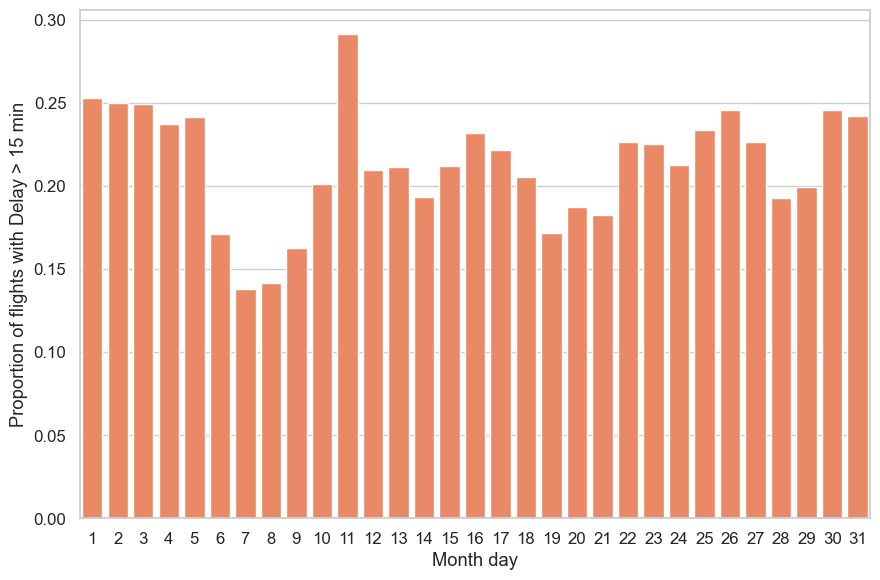

In [36]:
plt.figure(figsize=(9, 6))
sns.barplot(x=summary_df.index, y=summary_df['Prop_DepDel15'], color='coral')
plt.xlabel("Month day")
plt.ylabel("Proportion of flights with Delay > 15 min")
plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import f_oneway

# Assuming your DataFrame is named df

# Group the data by Reporting_Airline
grouped_data = df.groupby('Reporting_Airline')

# Create an empty list to store the DepDelay data for each group
dep_delay_groups = []

# Iterate through each group and extract DepDelay data
for group_name, group_df in grouped_data:
    dep_delay_data = group_df['DepDelay'].dropna()  # Drop missing values if any
    dep_delay_groups.append(dep_delay_data)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*dep_delay_groups)

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")

One-way ANOVA Results:
F-statistic: 1027.2656812434443
P-value: 0.0
Reject the null hypothesis: There is a significant difference between groups.


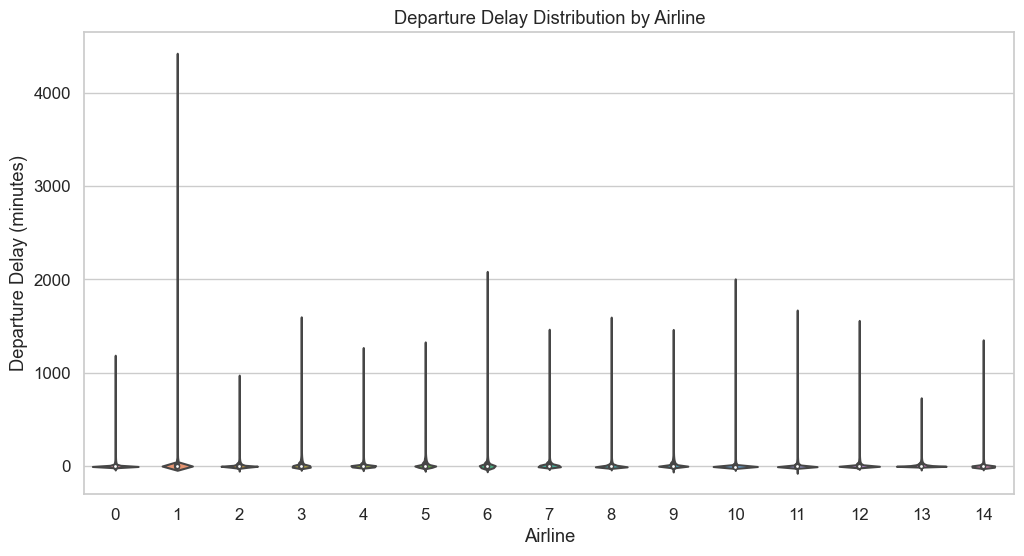

In [54]:
grouped_data = df.groupby('Reporting_Airline')

# Create an empty list to store the DepDelay data for each group
dep_delay_groups = []

# Create a list to store the airline names
airline_names = []

# Iterate through each group and extract DepDelay data and airline names
for group_name, group_df in grouped_data:
    dep_delay_data = group_df['DepDelay'].dropna()  # Drop missing values if any
    dep_delay_groups.append(dep_delay_data)
    airline_names.append(group_name)

# Create a boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.violinplot(dep_delay_groups)
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay Distribution by Airline')
plt.show()